In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ahu = pd.read_csv("/content/drive/MyDrive/ime_project/data/porest_area_ahu_automatic.csv")
chiller = pd.read_csv("/content/drive/MyDrive/ime_project/data/porest_area_chiller_automatic.csv")

column_e = ['no', 'id', 'seq', 'type', 'val', 'rv', 'ri', 'sv', 'si', 'tv', 'ti', 'fire', 'temperature', 'humidity', 'cdate']
e = pd.read_csv('/content/drive/MyDrive/ime_project/data/porest_device_e_log.csv', names=column_e)

column_plant = ["no", "id", "seq", "air", "monoxide", "dioxide", "pm2d5", "pm10", "temperature", "humidit", "score", "cdate"]
plant = pd.read_csv('/content/drive/MyDrive/ime_project/data/porest_device_plant_log.csv', names=column_plant)

# 장치 정보
devices = pd.read_excel("/content/drive/MyDrive/ime_project/data/porest_devices.xlsx",header=1)

# ahu

In [ ]:
ahu.head(10)

,no,ahu_no,building,power,inv,occupancy,out_temp,in_temp,zone_min_temp,cdate
0,1,1,A,1,30,8,24.0,\N,\N,2023-01-31 10:09
1,2,2,A,0,0,8,24.0,\N,\N,2023-01-31 10:09
2,3,3,A,1,30,8,24.0,\N,\N,2023-01-31 10:09
3,4,4,A,0,0,5,24.0,\N,\N,2023-01-31 10:09
4,5,5,A,1,30,5,24.0,\N,\N,2023-01-31 10:09


In [ ]:
ahu.iloc[6000:6020]

,no,ahu_no,building,power,inv,occupancy,out_temp,in_temp,zone_min_temp,cdate
6000,6001,6,A,0,0,4,31.480,27.93,26.05,2023-02-10 12:40
6001,6002,7,A,1,31,4,31.480,27.93,26.05,2023-02-10 12:40
6002,6003,8,A,1,31,4,31.480,27.89,26.05,2023-02-10 12:40
6003,6004,9,A,1,31,4,31.480,27.89,26.05,2023-02-10 12:40
6004,6005,10,A,0,0,5,31.480,28.1,25.9,2023-02-10 12:40
6005,6006,11,A,1,32,5,31.480,28.1,25.9,2023-02-10 12:40
6006,6007,12,A,0,0,4,31.480,27.96,26.05,2023-02-10 12:40
6007,6008,13,A,1,31,4,31.480,27.96,26.05,2023-02-10 12:40
6008,6009,14,A,0,0,4,31.480,27.96,26.05,2023-02-10 12:40
6009,6010,19,C,1,30,1,31.480,26.7,26.5,2023-02-10 12:40


In [ ]:
# cdate 열을 날짜와 시간 형식으로 변환
ahu['cdate'] = pd.to_datetime(ahu['cdate'])
ahu.replace("\\N", np.nan, inplace=True)

# 주차별로 데이터 분리
weeks = ahu.groupby(pd.Grouper(key='cdate', freq='W'))  # 주차로 데이터 그룹화


for week_number, week_data in enumerate(weeks):
    week_start_date = week_data[1]['cdate'].min()
    week_end_date = week_data[1]['cdate'].max()
    print(f"Week {week_number + 1}: {week_start_date} to {week_end_date}")

    # 결측치 계산
    missing_data = week_data[1].isnull().sum()
    print("Missing Data:")
    print(missing_data)
    print("=" * 30)

In [ ]:
ahu.columns

Index(['no', 'ahu_no', 'building', 'power', 'inv', 'occupancy', 'out_temp',
       'in_temp', 'zone_min_temp', 'cdate'],
      dtype='object')

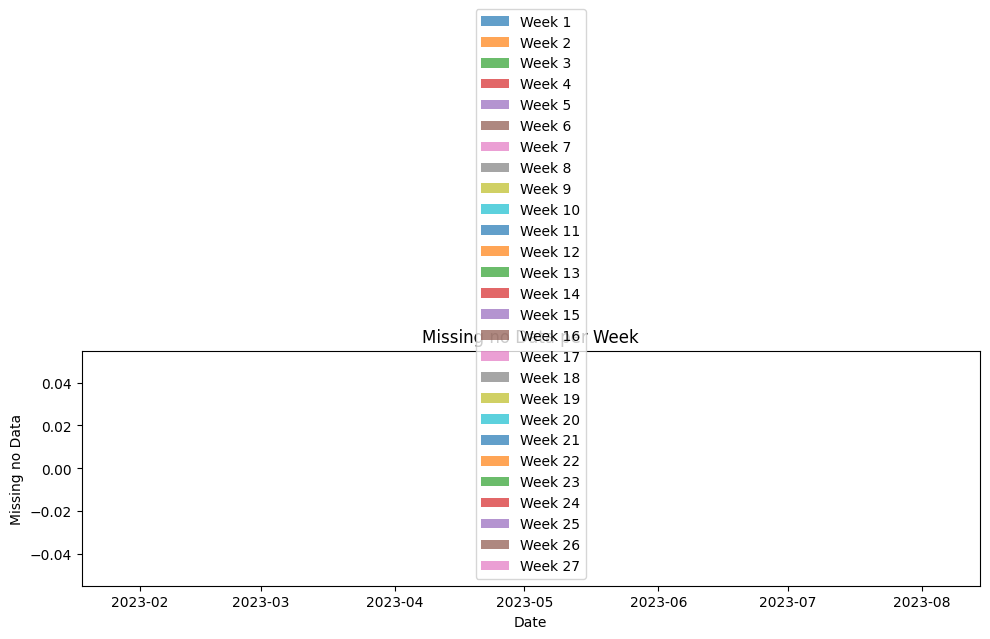

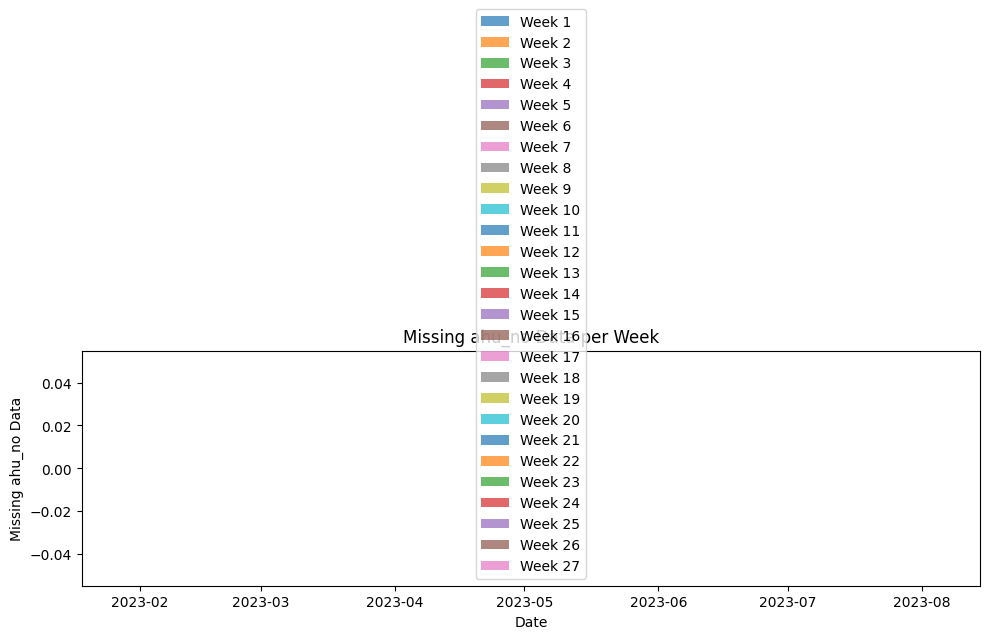

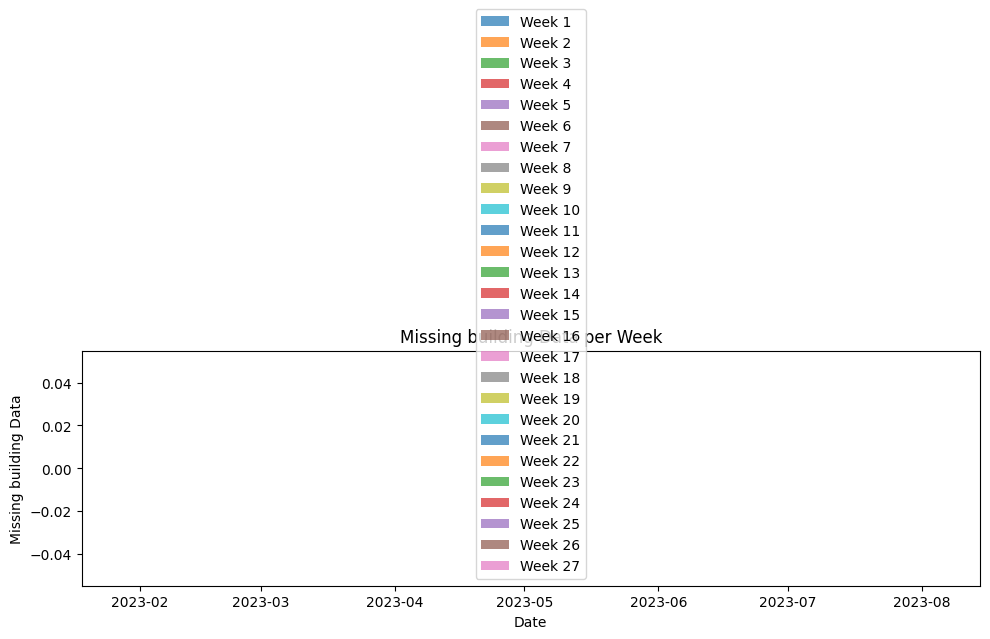

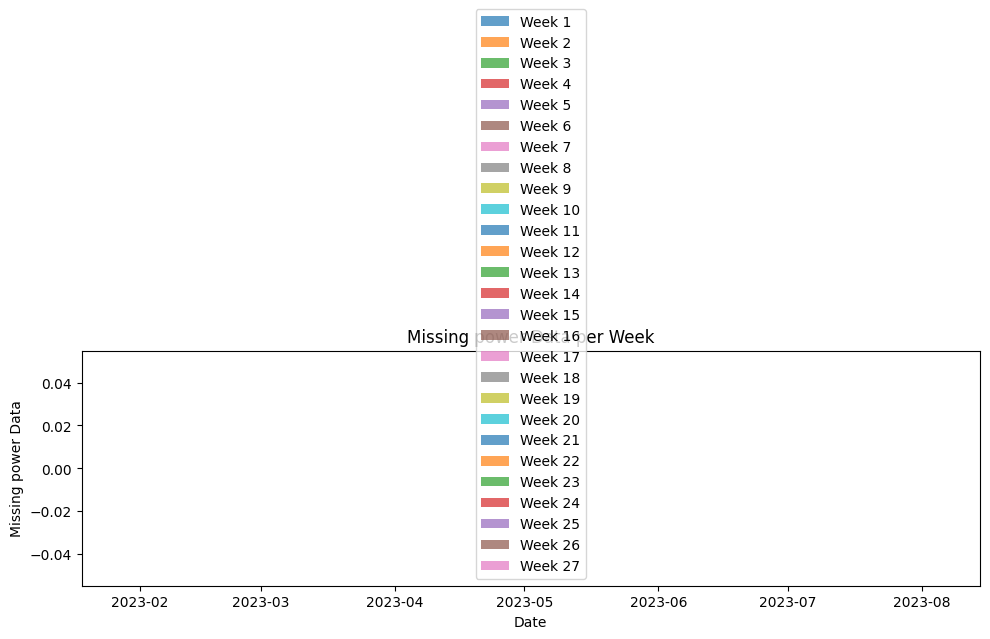

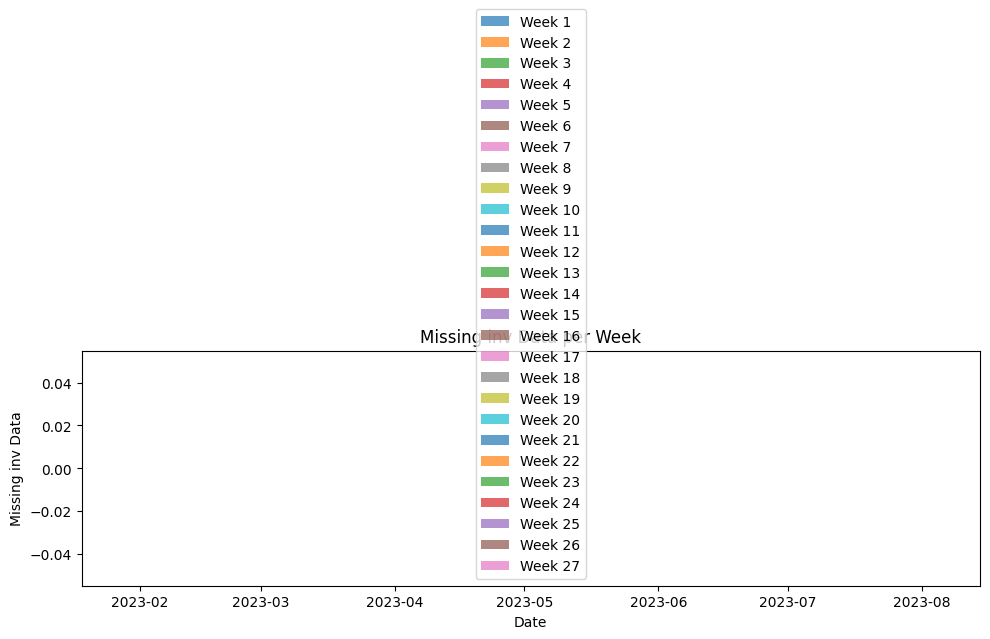

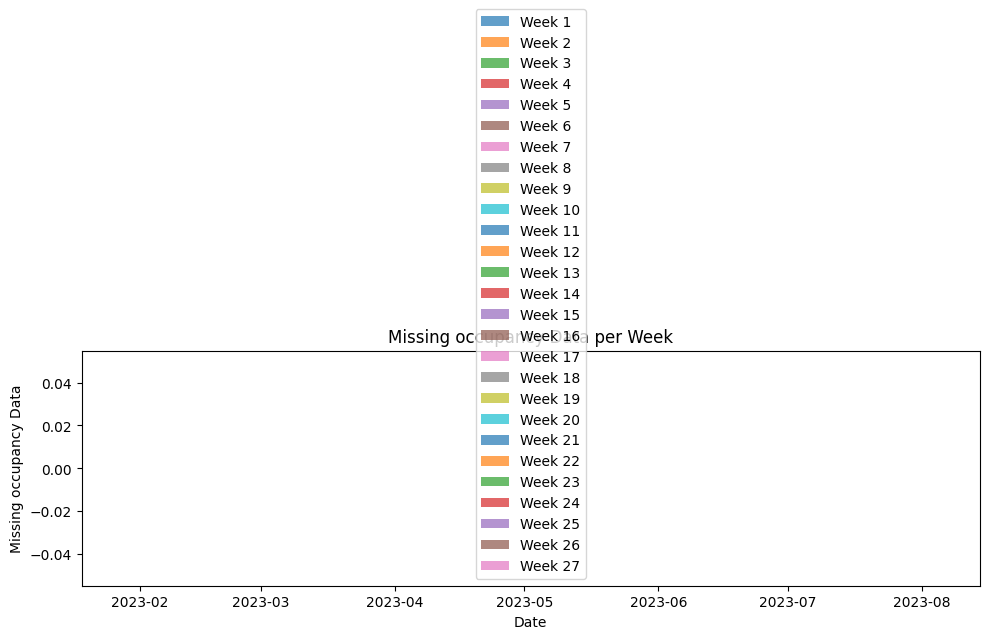

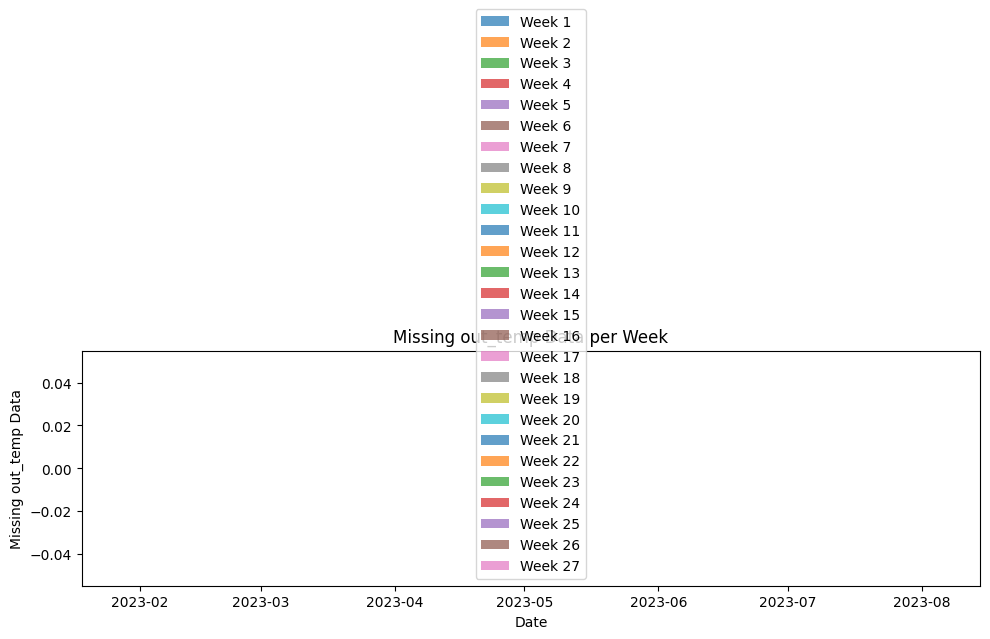

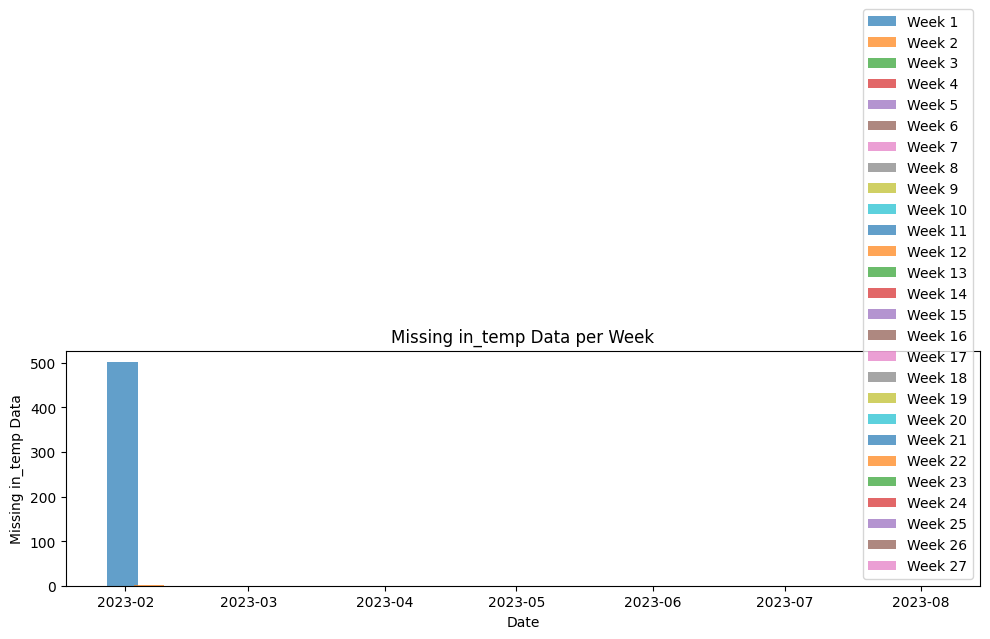

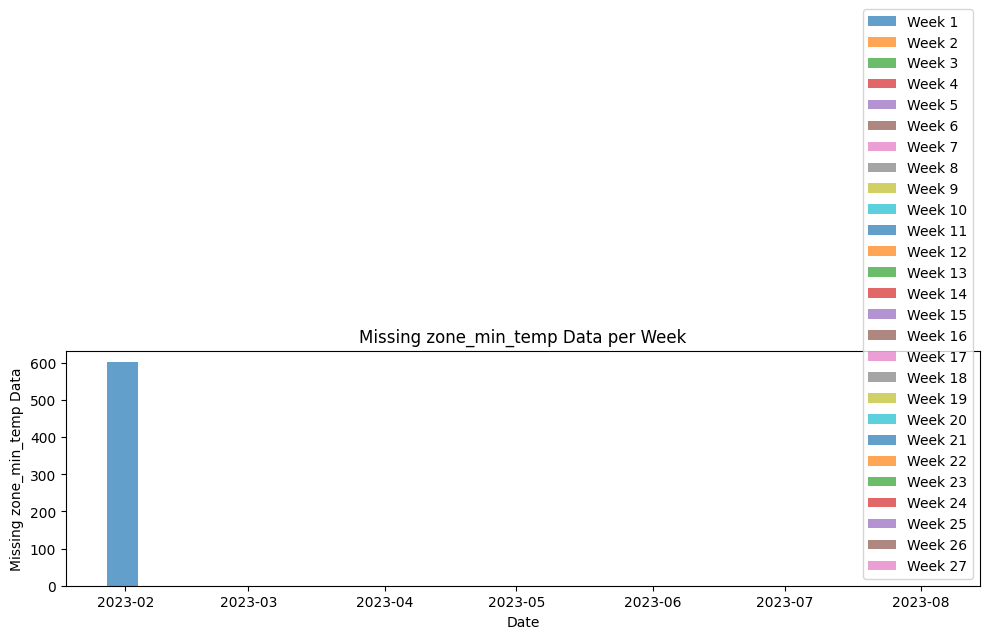

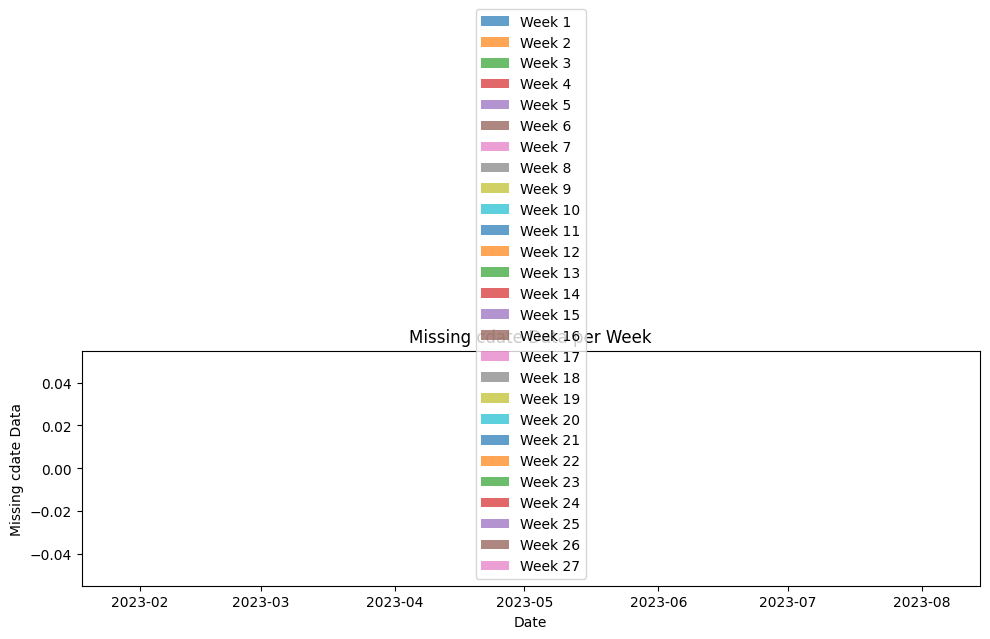

In [ ]:
# cdate 열을 날짜와 시간 형식으로 변환
ahu['cdate'] = pd.to_datetime(ahu['cdate'])
ahu.replace("\\N", np.nan, inplace=True)

# 주차별로 데이터 분리
weeks = ahu.groupby(pd.Grouper(key='cdate', freq='W'))  # 주차로 데이터 그룹화

features = ahu.columns

for feature in features:
    plt.figure(figsize=(10, 5))
    for week_number, week_data in enumerate(weeks):
        week_start_date = week_data[1]['cdate'].min()
        week_end_date = week_data[1]['cdate'].max()

        # 결측치 계산
        missing_data = week_data[1][feature].isnull().sum()

        # 주차별로 결측치를 막대 그래프로 시각화
        plt.bar(week_start_date, missing_data, width=7, label=f'Week {week_number + 1}', alpha=0.7)

    plt.xlabel('Date')
    plt.ylabel(f'Missing {feature} Data')
    plt.title(f'Missing {feature} Data per Week')
    plt.legend()
    plt.tight_layout()
    plt.show()

# chiller

In [ ]:
chiller.head()

,no,chiller_no,step,temp,power,inv,cdate
0,1,1,\N,\N,1,40,2023-01-30 13:15
1,2,1,\N,\N,1,40,2023-01-31 10:18
2,3,2,\N,\N,1,40,2023-01-31 10:18
3,4,1,\N,\N,1,40,2023-01-31 10:20
4,5,1,\N,\N,1,40,2023-01-31 10:21


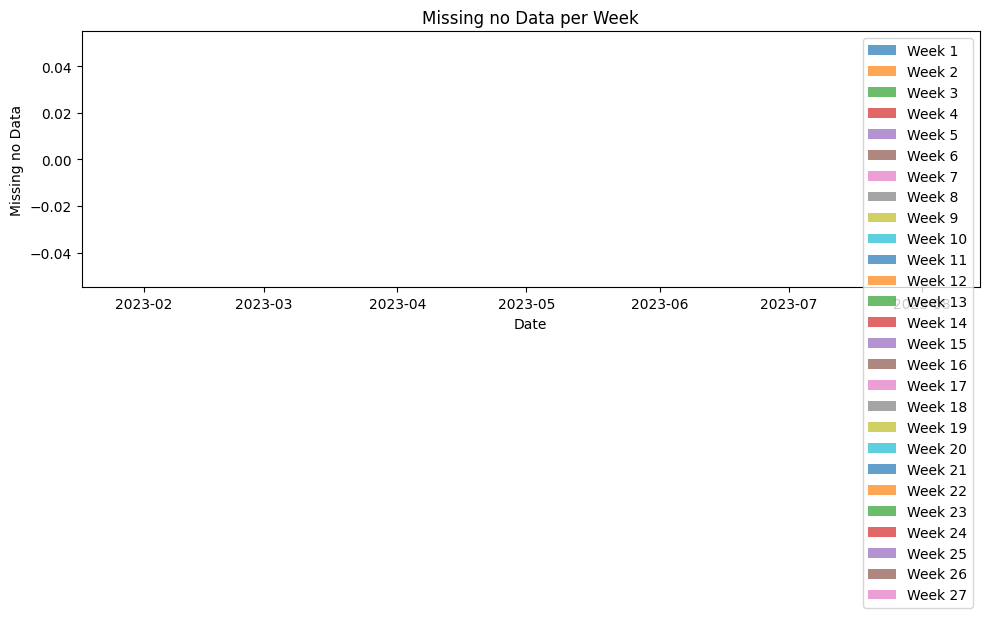

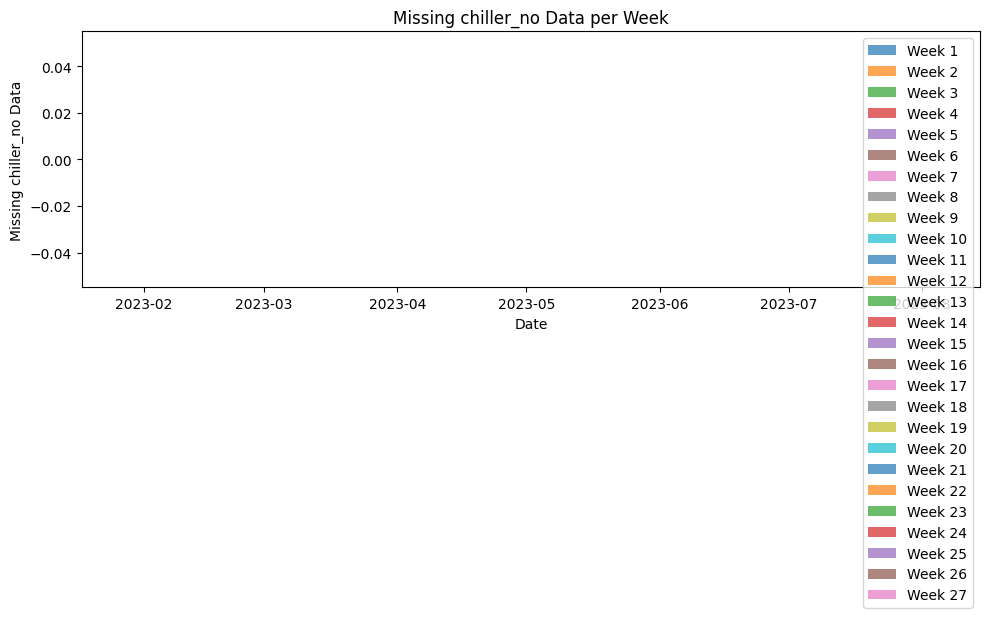

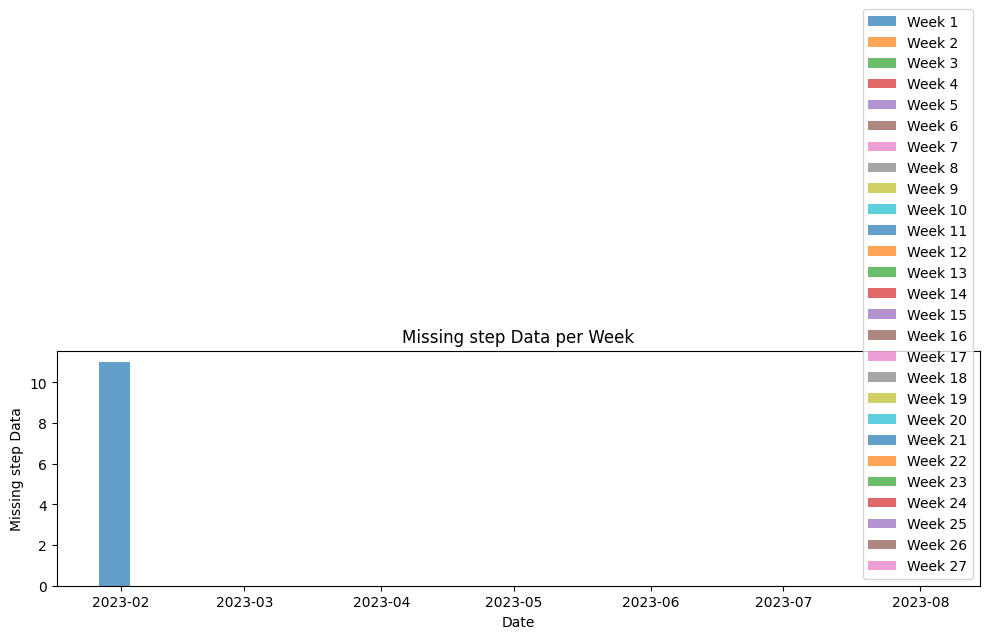

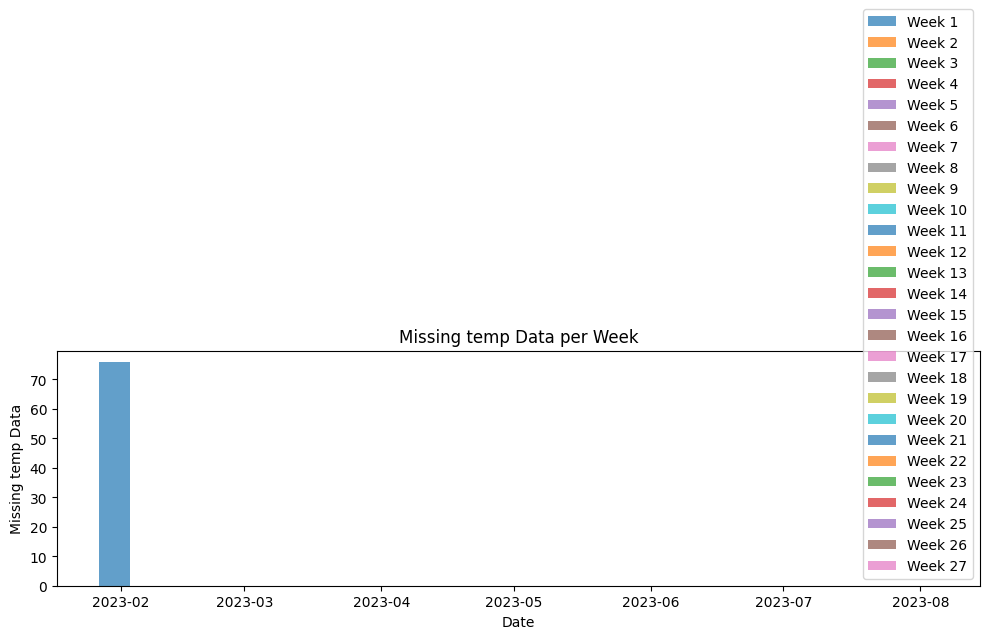

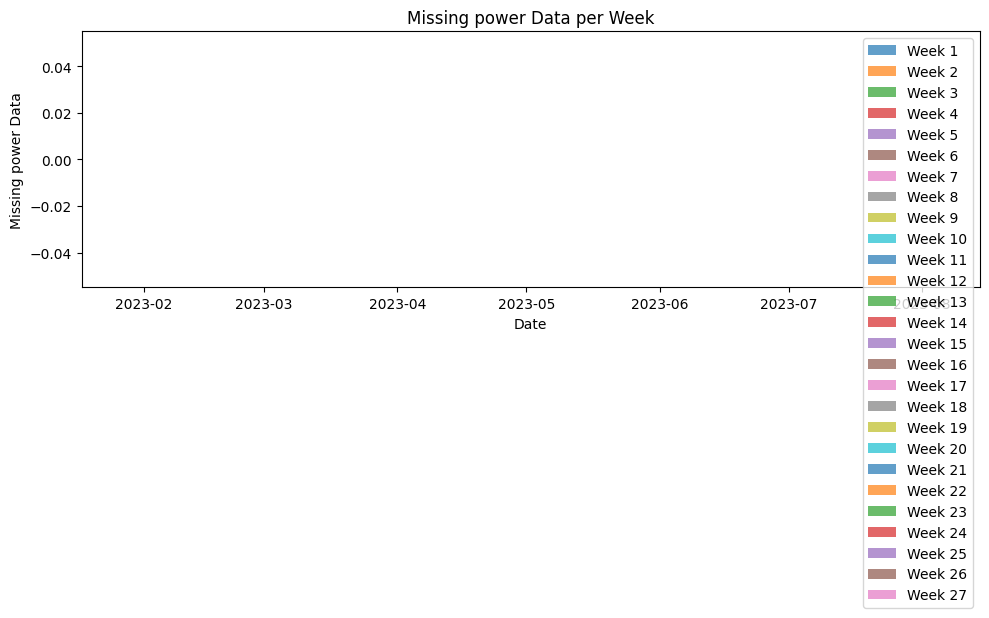

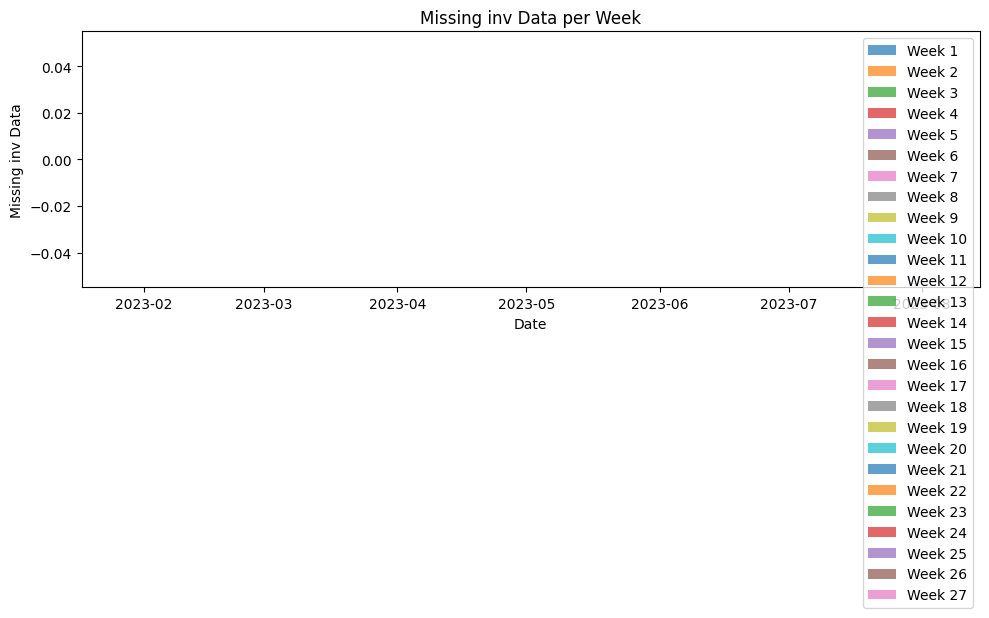

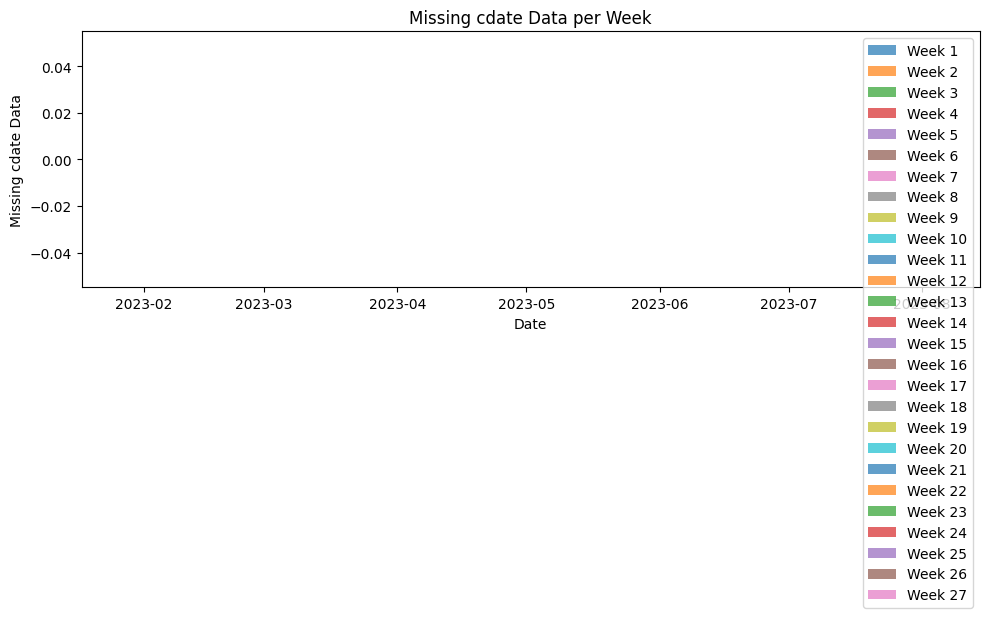

In [ ]:
# cdate 열을 날짜와 시간 형식으로 변환
chiller['cdate'] = pd.to_datetime(chiller['cdate'])
chiller.replace("\\N", np.nan, inplace=True)

# 주차별로 데이터 분리
weeks = chiller.groupby(pd.Grouper(key='cdate', freq='W'))  # 주차로 데이터 그룹화

features = chiller.columns

for feature in features:
    plt.figure(figsize=(10, 5))
    for week_number, week_data in enumerate(weeks):
        week_start_date = week_data[1]['cdate'].min()
        week_end_date = week_data[1]['cdate'].max()

        # 결측치 계산
        missing_data = week_data[1][feature].isnull().sum()

        # 주차별로 결측치를 막대 그래프로 시각화
        plt.bar(week_start_date, missing_data, width=7, label=f'Week {week_number + 1}', alpha=0.7)

    plt.xlabel('Date')
    plt.ylabel(f'Missing {feature} Data')
    plt.title(f'Missing {feature} Data per Week')
    plt.legend()
    plt.tight_layout()
    plt.show()

# e

In [ ]:
e.head()

,3640033,c2-04-d8-a0-1d-58-c7-b8,345,2,169.495,0.7,0.2065,0.7.1,0.2655,0.7.2,0.2714,255,33.79,33.67,2023-01-01 00:00:00
0,3640034,c2-04-d8-a0-1d-58-c7-28,1430,2,239.4460,0.7,0.47200,0.7,0.1062,0.7,0.47200,255,33.12,33.81,2023-01-01 00:00:01
1,3640035,c2-04-d8-a0-1d-58-c6-d0,420,2,4353.4900,0.7,2.41998,0.6,10.8309,0.7,5.84338,255,32.57,34.81,2023-01-01 00:00:03
2,3640036,c2-04-d8-a0-1d-58-c6-44,2,2,259.6240,0.7,0.53100,0.7,0.0767,0.7,0.53100,255,33.36,32.73,2023-01-01 00:00:06
3,3640037,c2-04-d8-a0-1d-58-c6-74,3,2,49.7724,0.7,0.05900,0.7,0.1003,0.7,0.05900,255,32.26,35.35,2023-01-01 00:00:06
4,3640038,c2-04-d8-a0-1d-58-ca-dc,1440,2,270.3850,0.7,0.53100,0.7,0.1239,0.7,0.53100,255,32.76,34.13,2023-01-01 00:00:08


In [ ]:
column_e = ['no', 'id', 'seq', 'type', 'val', 'rv', 'ri', 'sv', 'si', 'tv', 'ti', 'fire', 'temperature', 'humidity', 'cdate']
e = pd.read_csv('/content/drive/MyDrive/ime_project/data/porest_device_e_log.csv', names=column_e)

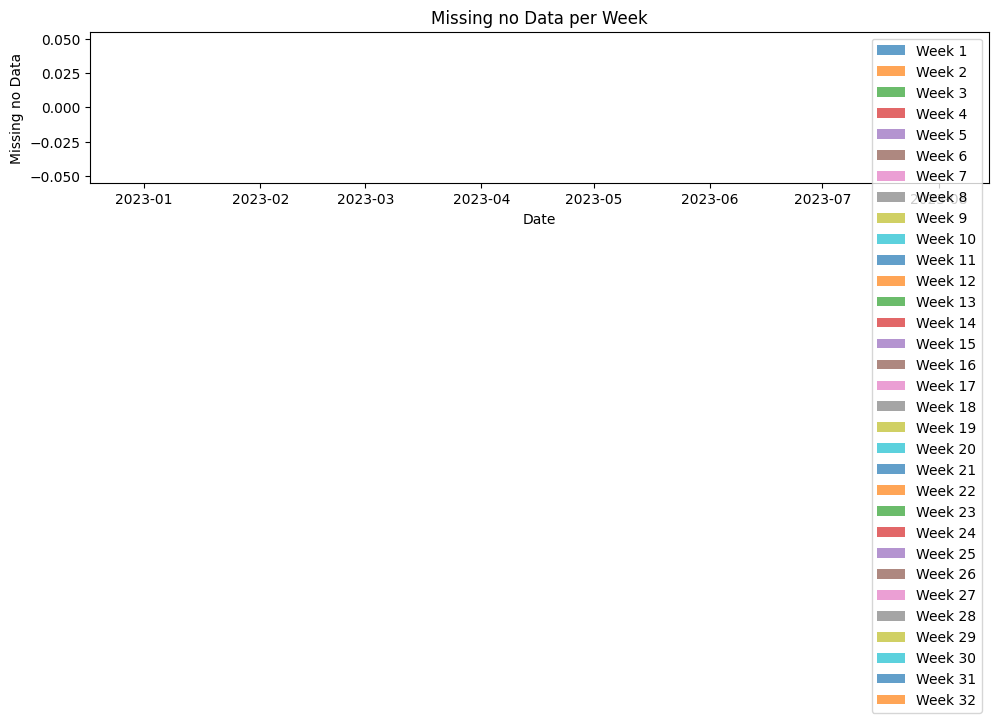

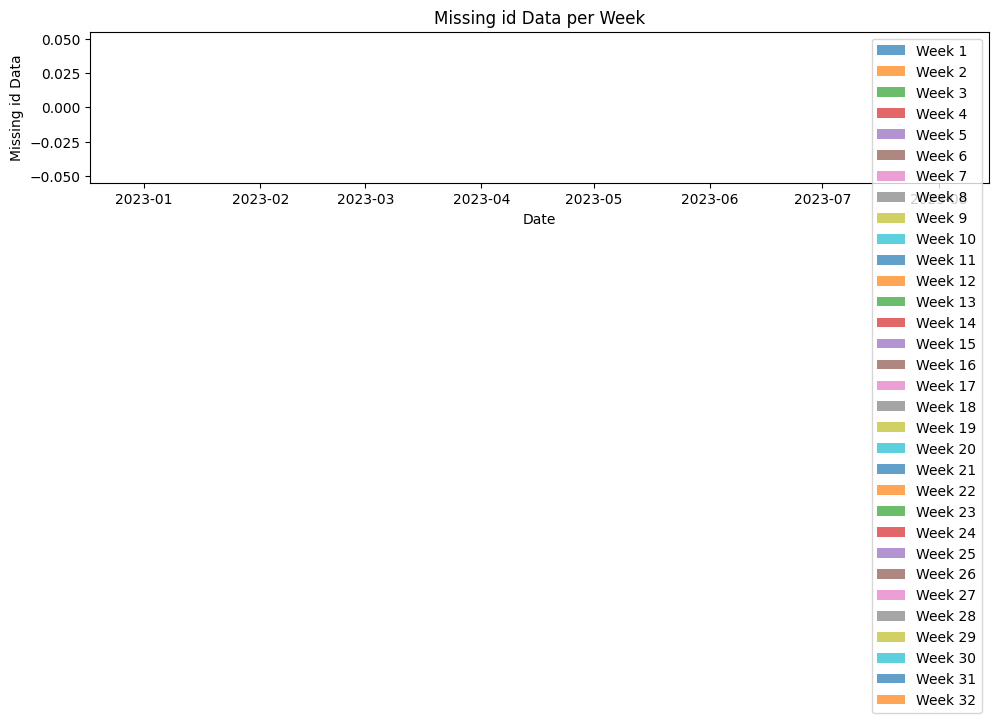

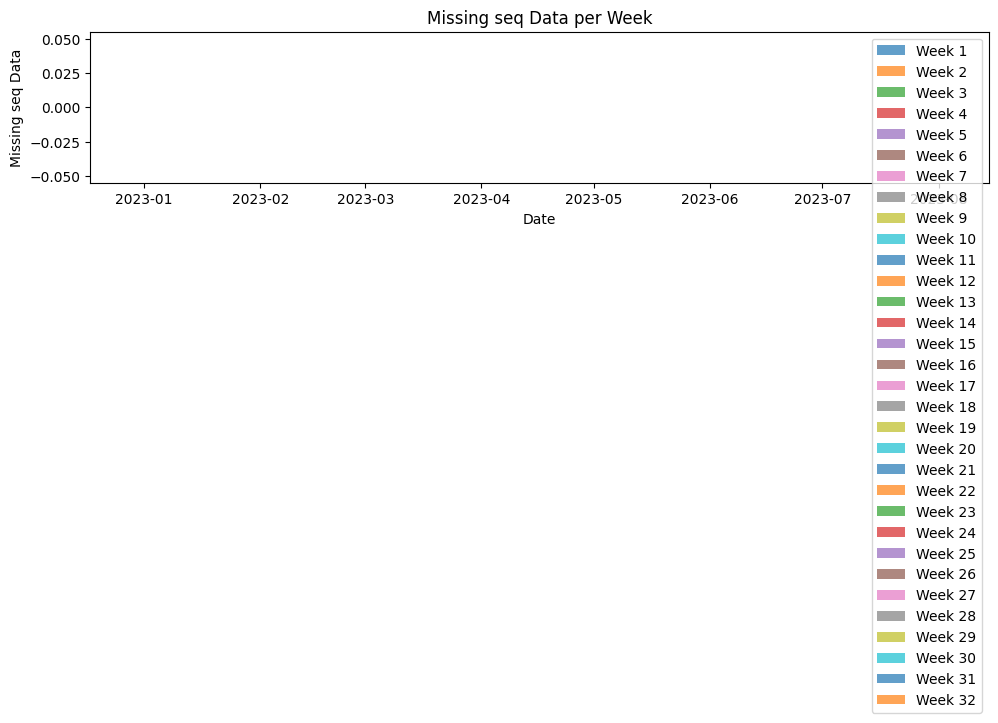

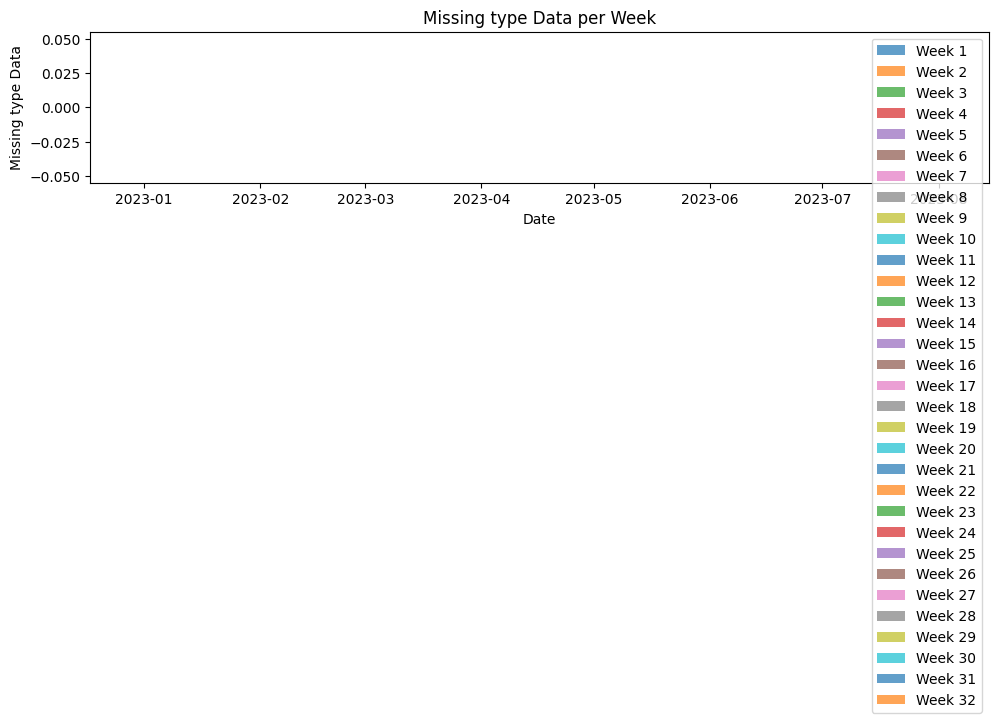

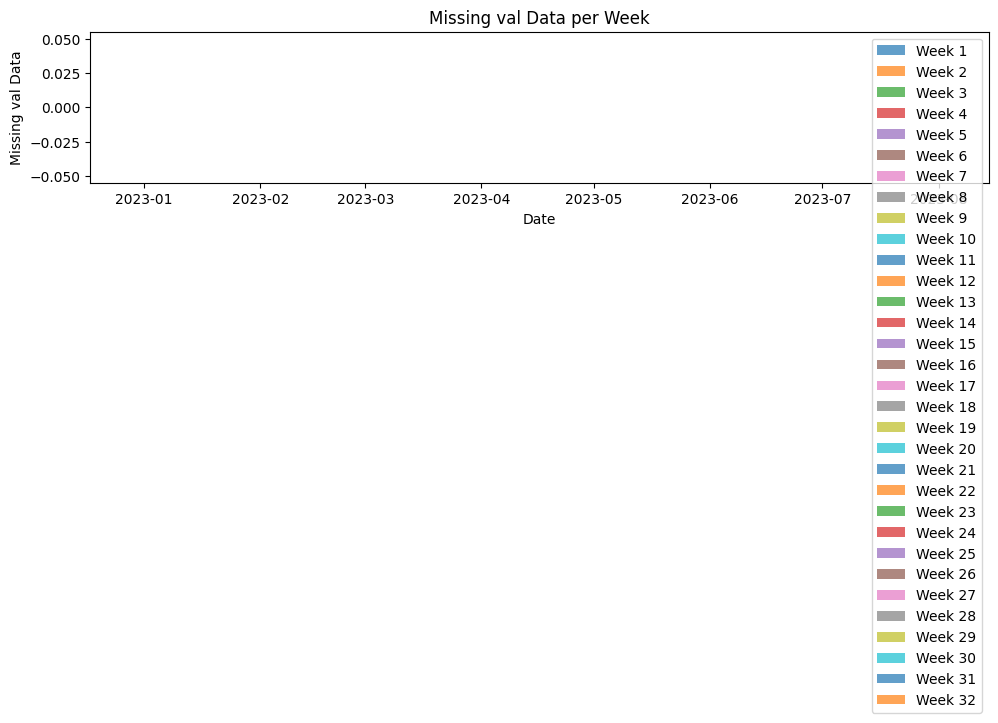

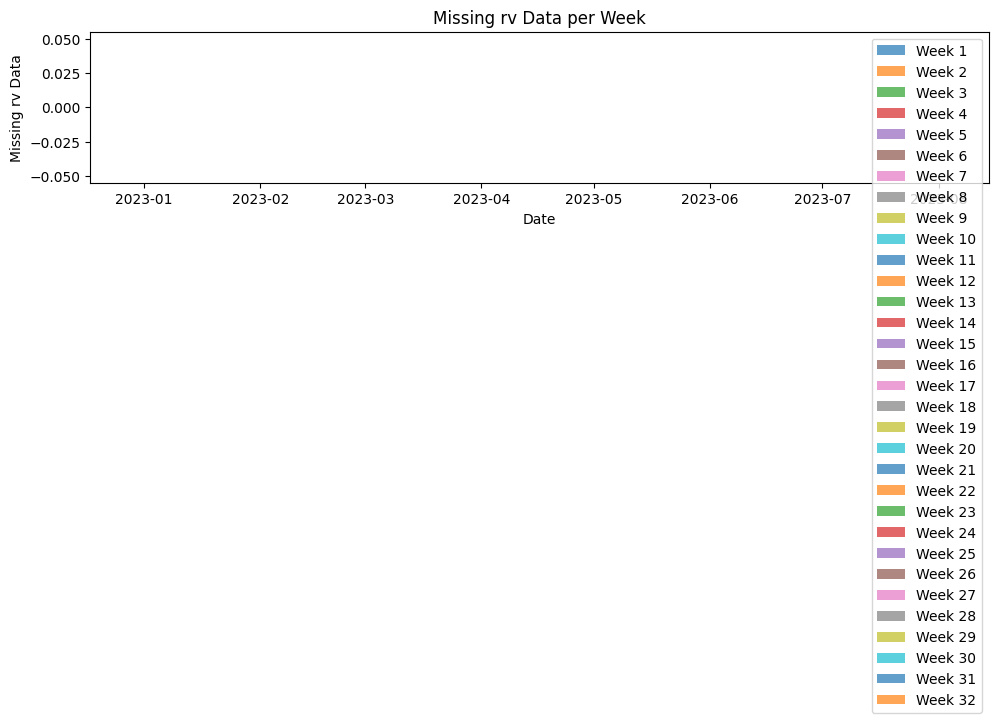

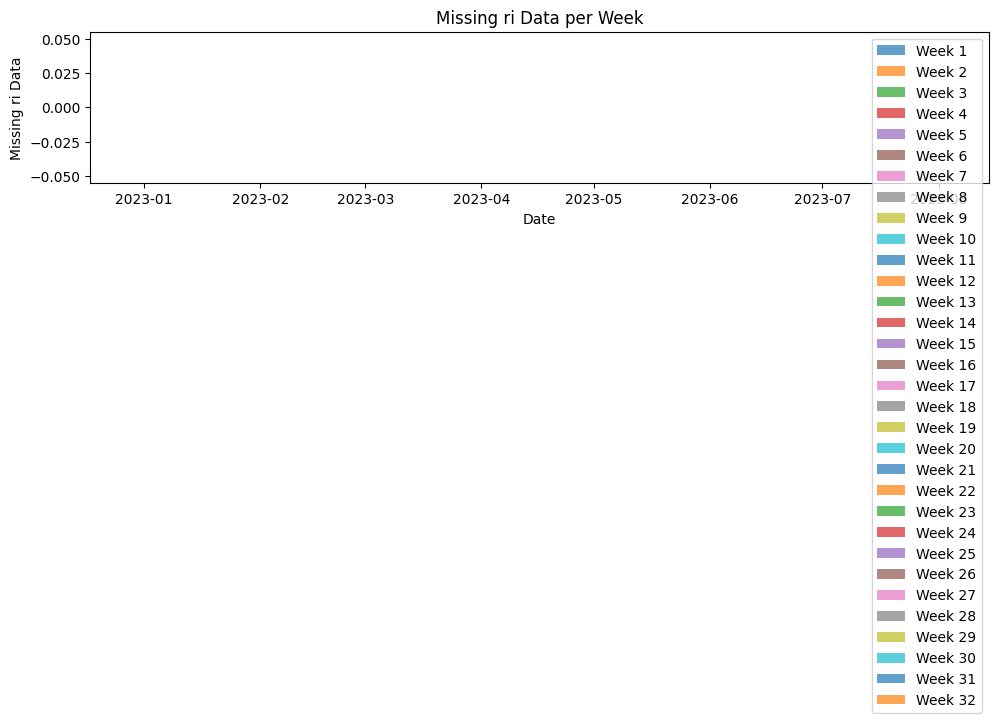

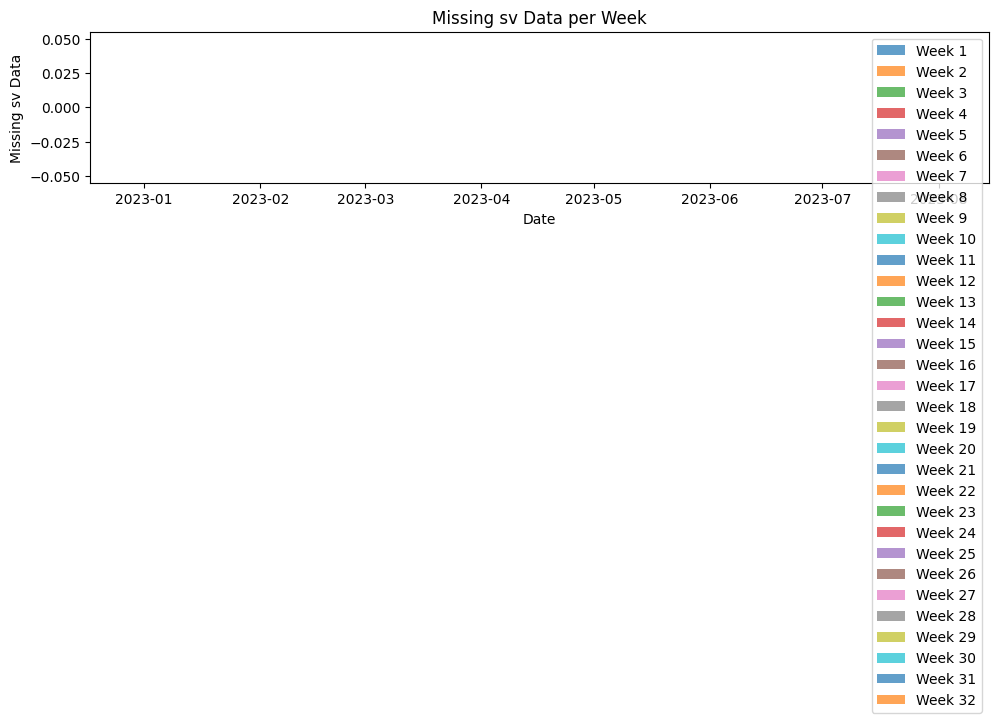

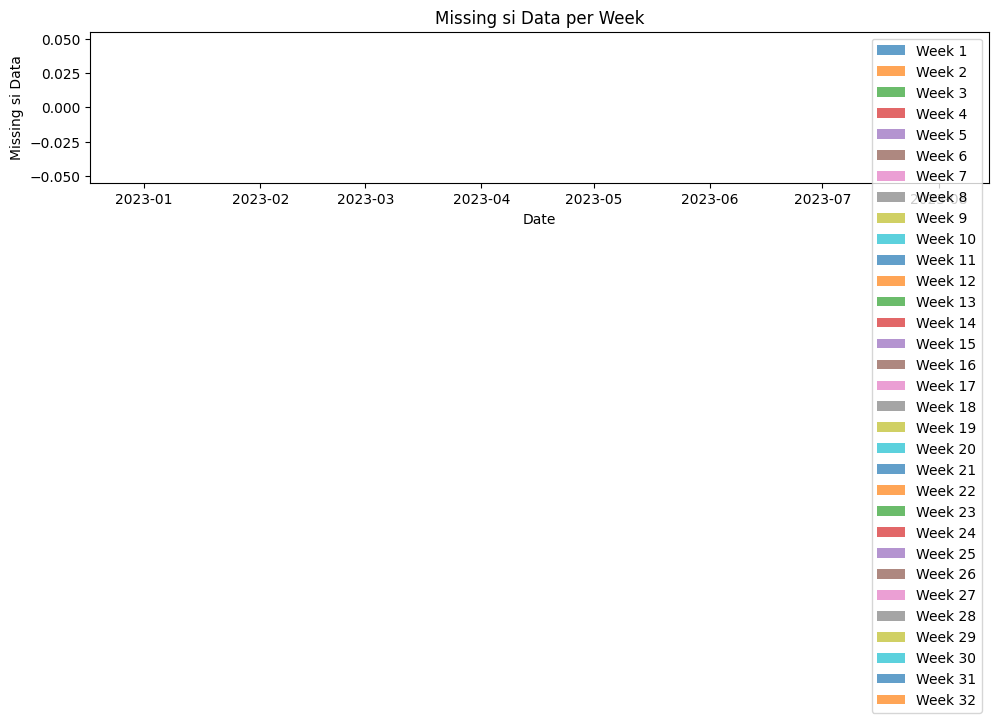

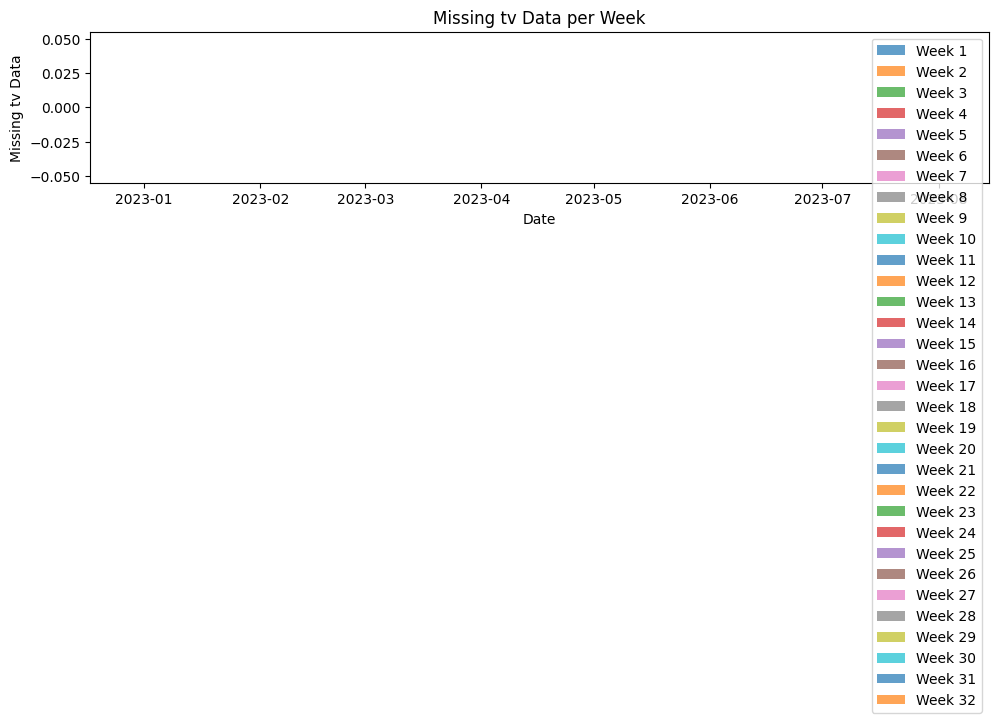

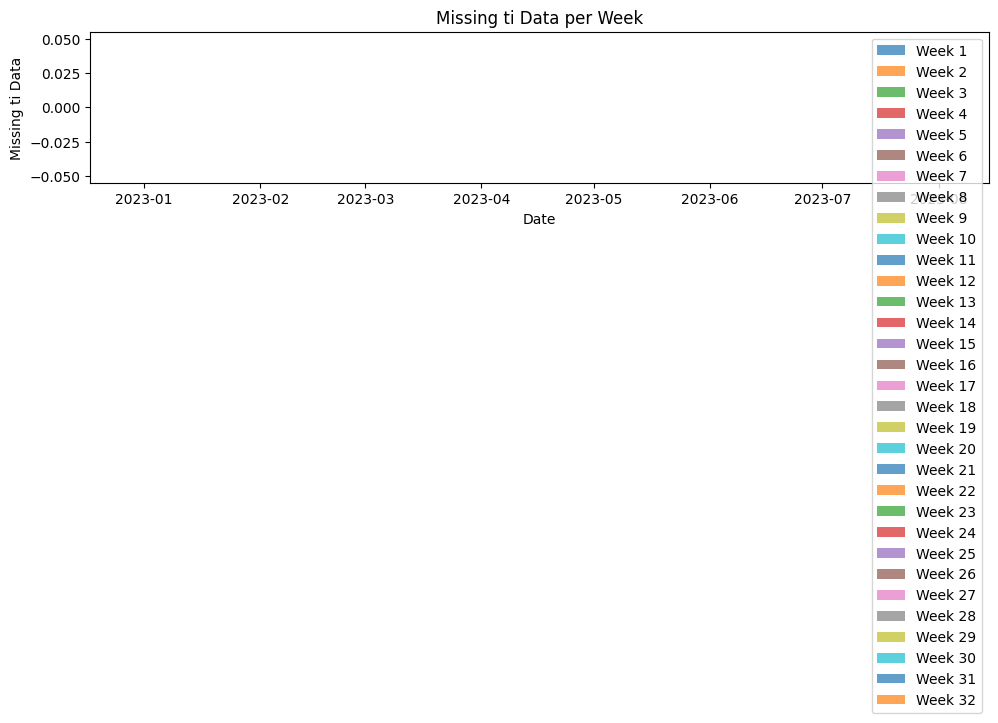

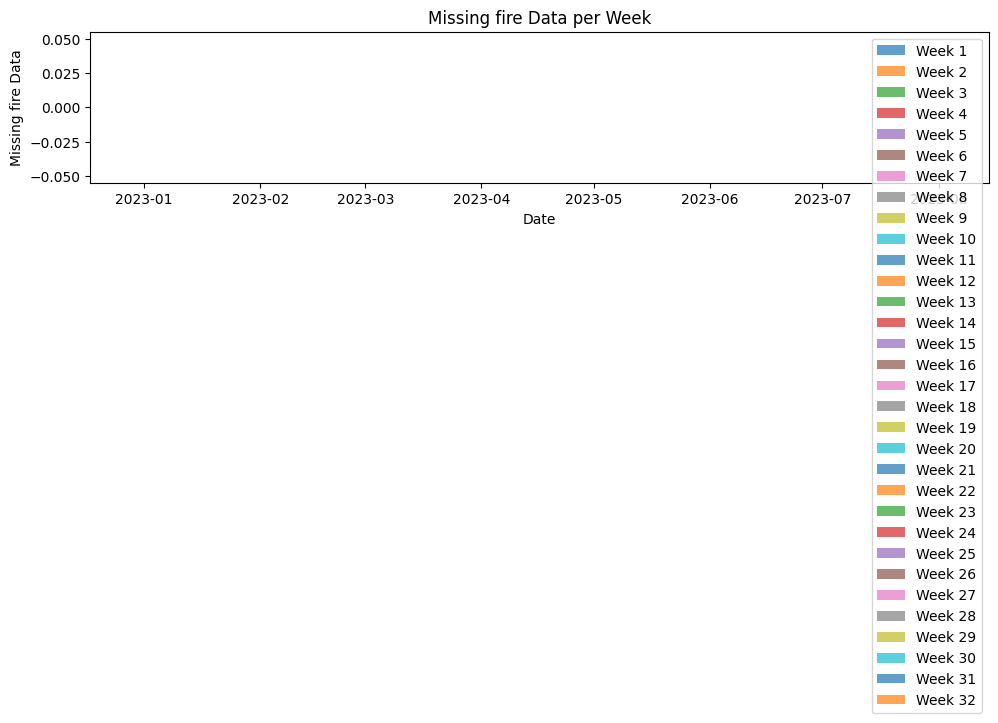

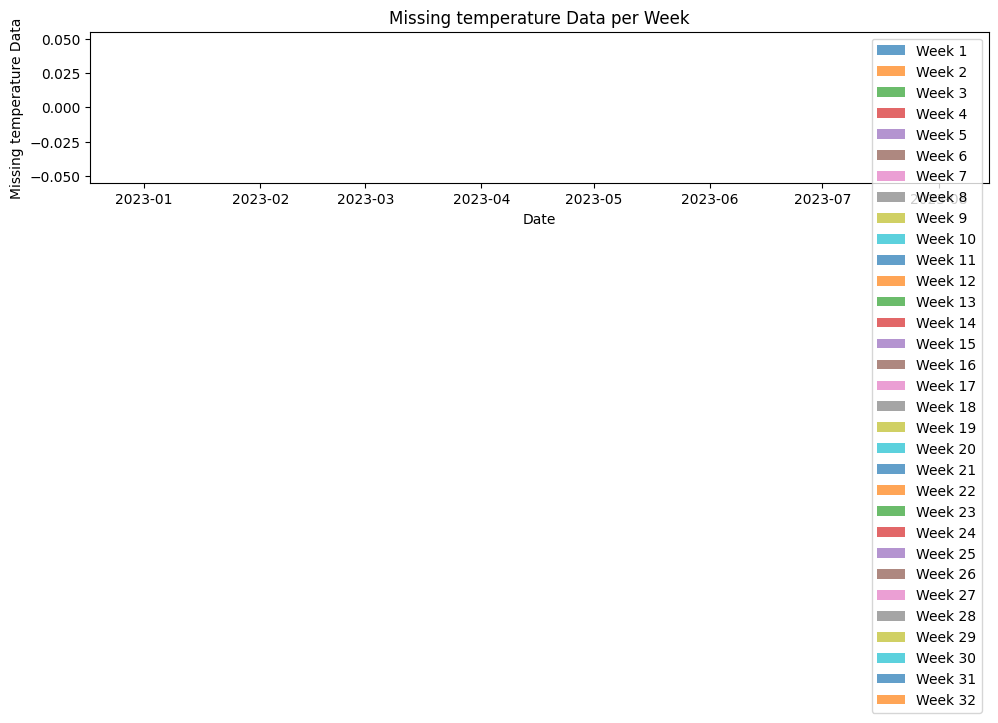

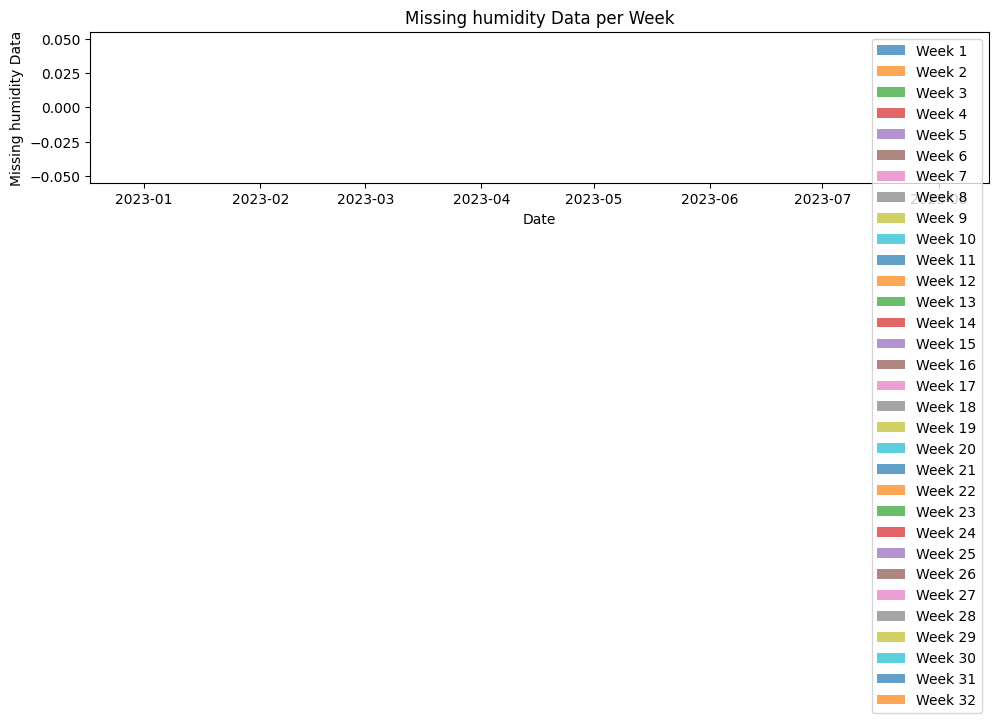

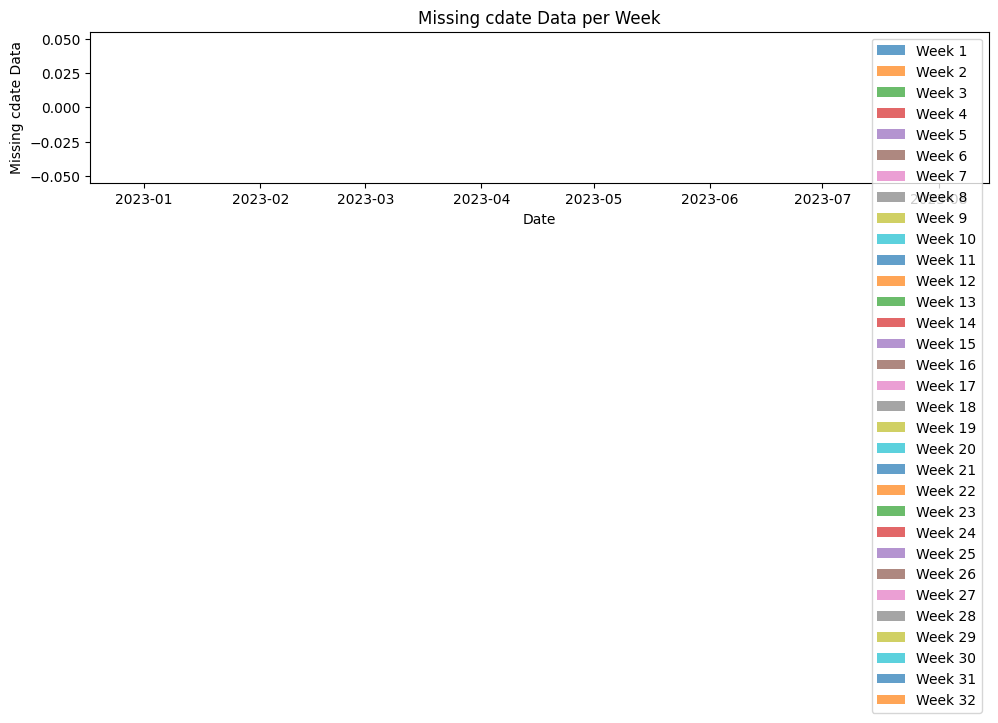

In [ ]:
# cdate 열을 날짜와 시간 형식으로 변환
e['cdate'] = pd.to_datetime(e['cdate'])
e.replace("\\N", np.nan, inplace=True)

# 주차별로 데이터 분리
weeks = e.groupby(pd.Grouper(key='cdate', freq='W'))  # 주차로 데이터 그룹화

features = e.columns

for feature in features:
    plt.figure(figsize=(10, 5))
    for week_number, week_data in enumerate(weeks):
        week_start_date = week_data[1]['cdate'].min()
        week_end_date = week_data[1]['cdate'].max()

        # 결측치 계산
        missing_data = week_data[1][feature].isnull().sum()

        # 주차별로 결측치를 막대 그래프로 시각화
        plt.bar(week_start_date, missing_data, width=7, label=f'Week {week_number + 1}', alpha=0.7)

    plt.xlabel('Date')
    plt.ylabel(f'Missing {feature} Data')
    plt.title(f'Missing {feature} Data per Week')
    plt.legend()
    plt.tight_layout()
    plt.show()

# plant

In [ ]:
plant.head()

,1333503,c2-01-d8-a0-1d-58-cf-4c,912,25,0,400,13,14,25.86,42.61,\N,2023-01-01 00:00:01
0,1333504,c2-01-d8-a0-1d-58-65-44,337,104,0,400,14,15,26.23,42.56,\N,2023-01-01 00:00:09
1,1333505,c2-01-d8-a0-1d-58-ce-74,663,0,1,447,15,17,27.17,41.22,\N,2023-01-01 00:00:18
2,1333506,c2-01-d8-a0-1d-59-b4-14,943,29,0,413,23,26,25.41,46.23,\N,2023-01-01 00:00:19
3,1333507,c2-01-d8-a0-1d-58-68-a4,888,164,0,585,11,12,26.17,36.11,\N,2023-01-01 00:00:26
4,1333508,c2-01-d8-a0-1d-59-b4-a0,945,39,6,471,21,23,25.15,47.07,\N,2023-01-01 00:00:27


In [ ]:
column_plant = ["no", "id", "seq", "air", "monoxide", "dioxide", "pm2d5", "pm10", "temperature", "humidit", "score", "cdate"]
plant = pd.read_csv('/content/drive/MyDrive/ime_project/data/porest_device_plant_log.csv', names=column_plant)

<ipython-input-38-9cb39a0e67b0>:2: DtypeWarning: Columns (3,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  plant = pd.read_csv('/content/drive/MyDrive/ime_project/data/porest_device_plant_log.csv', names=column_plant)


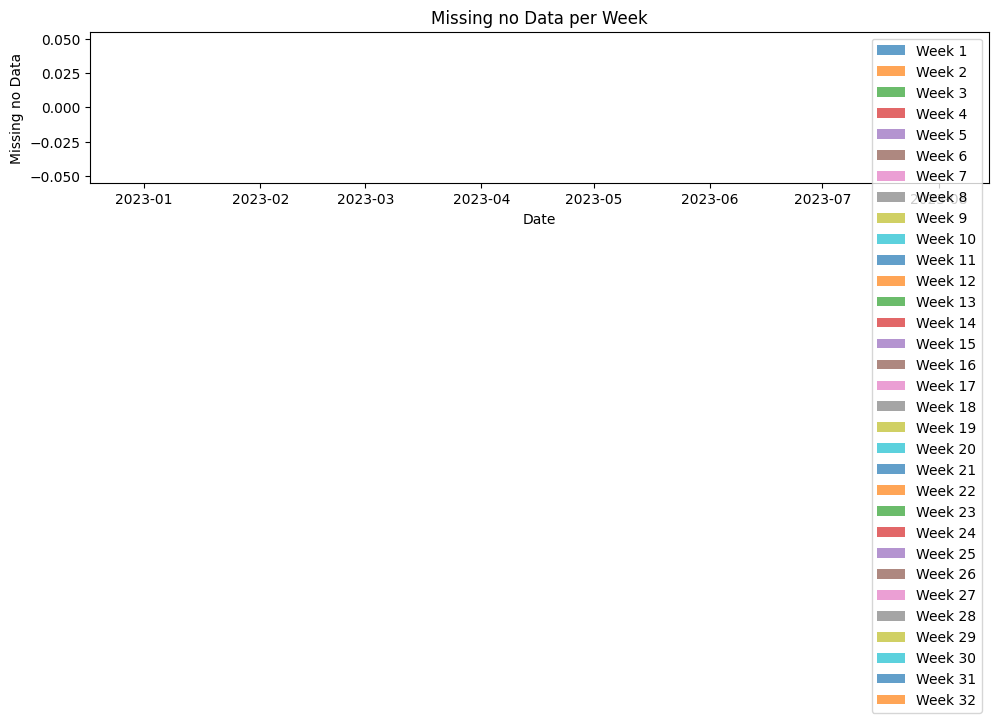

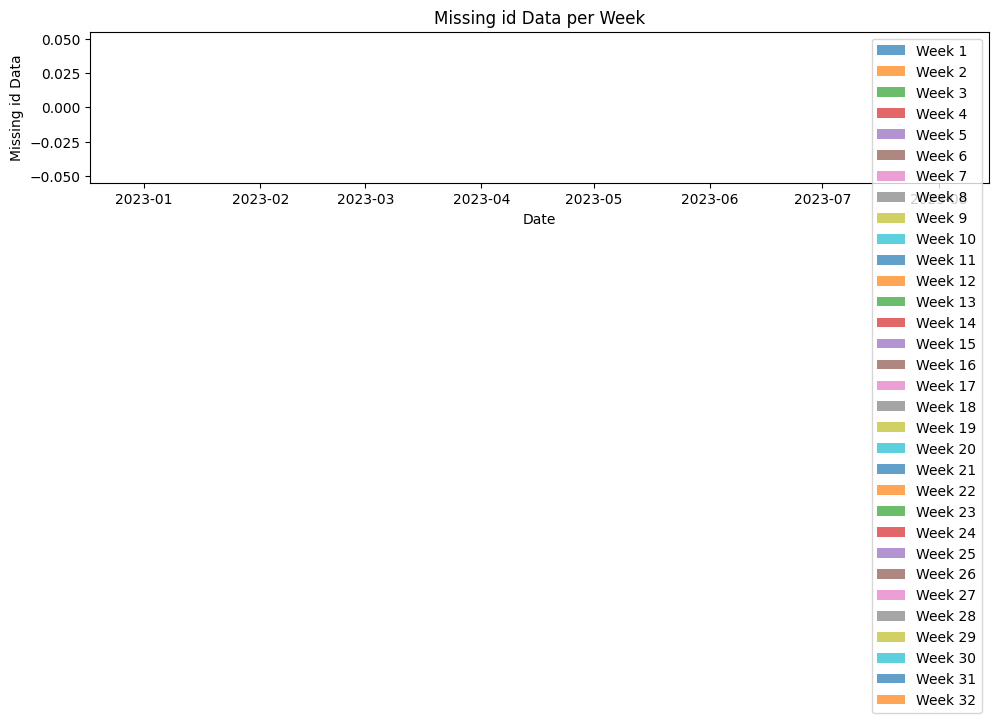

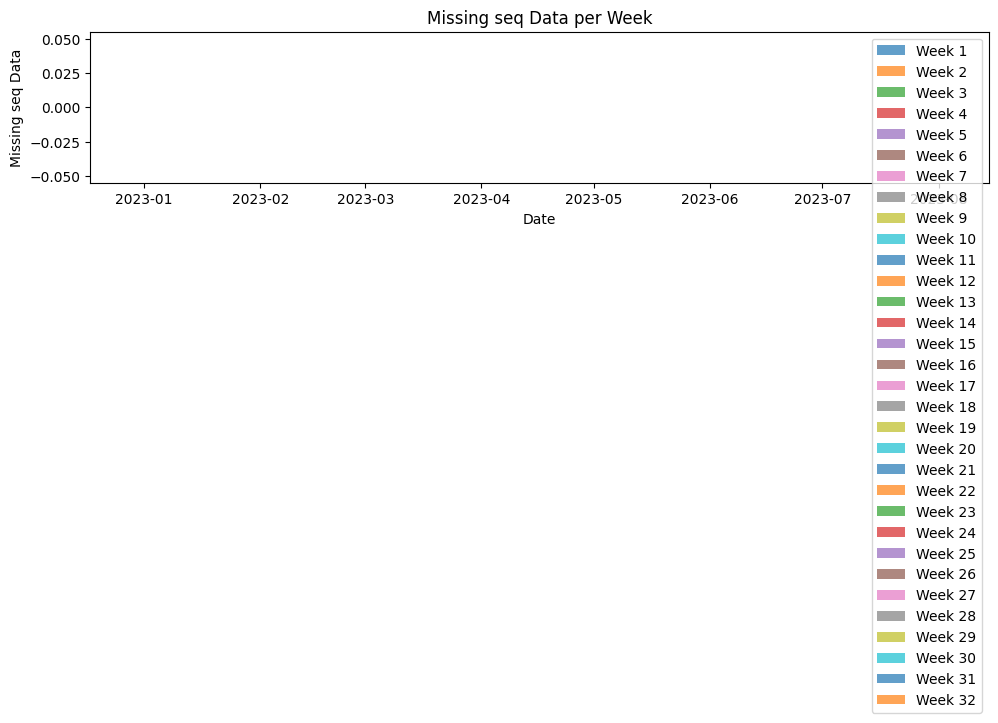

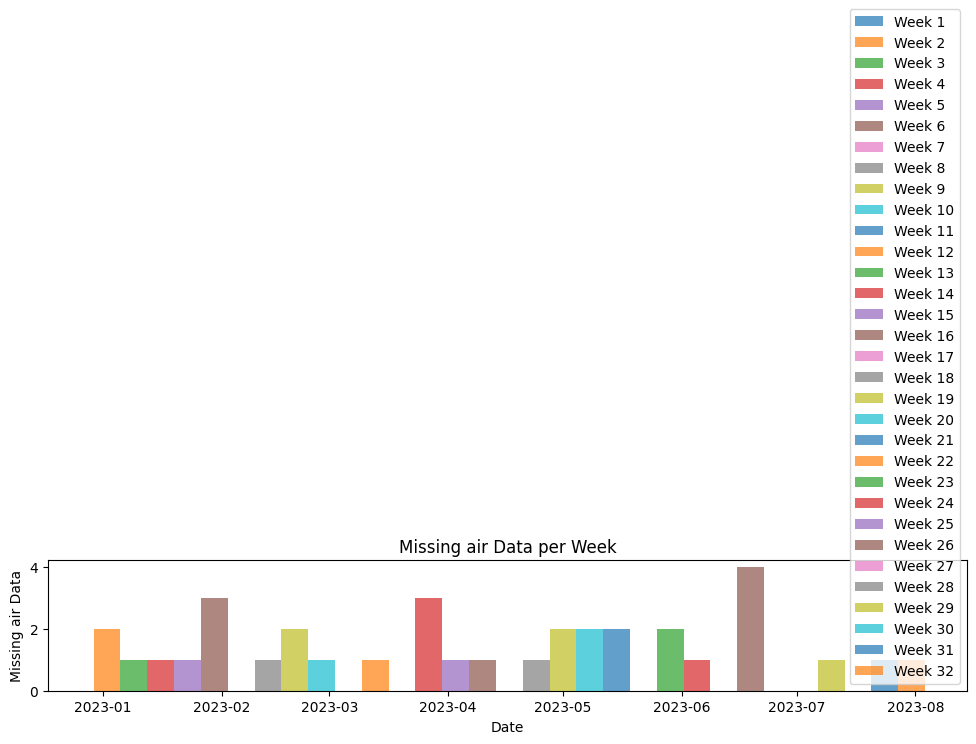

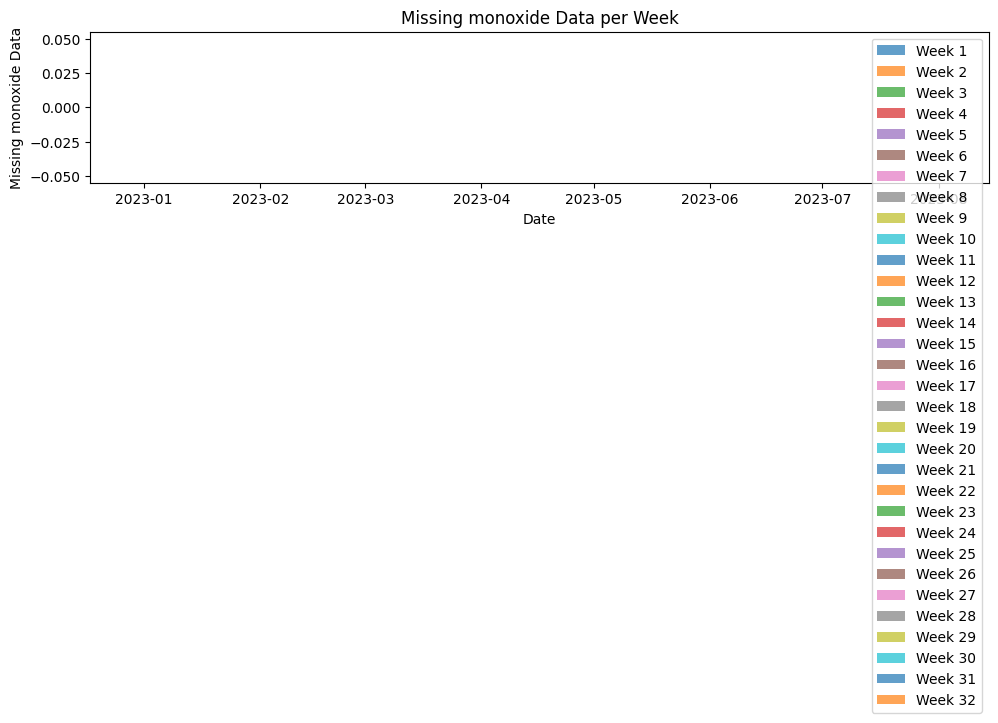

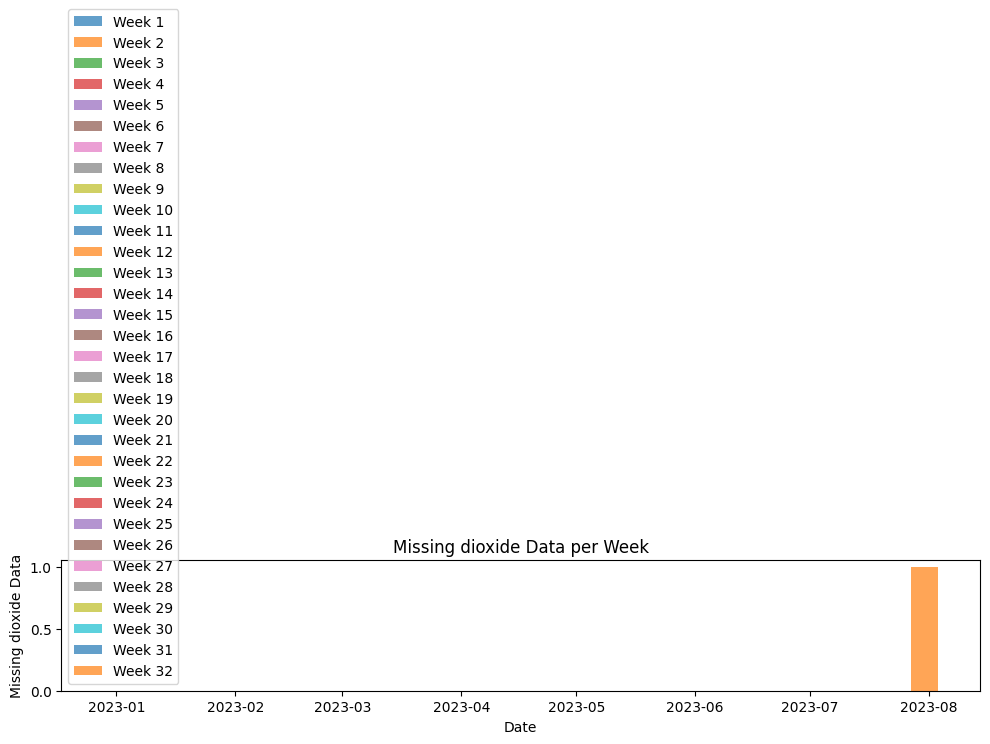

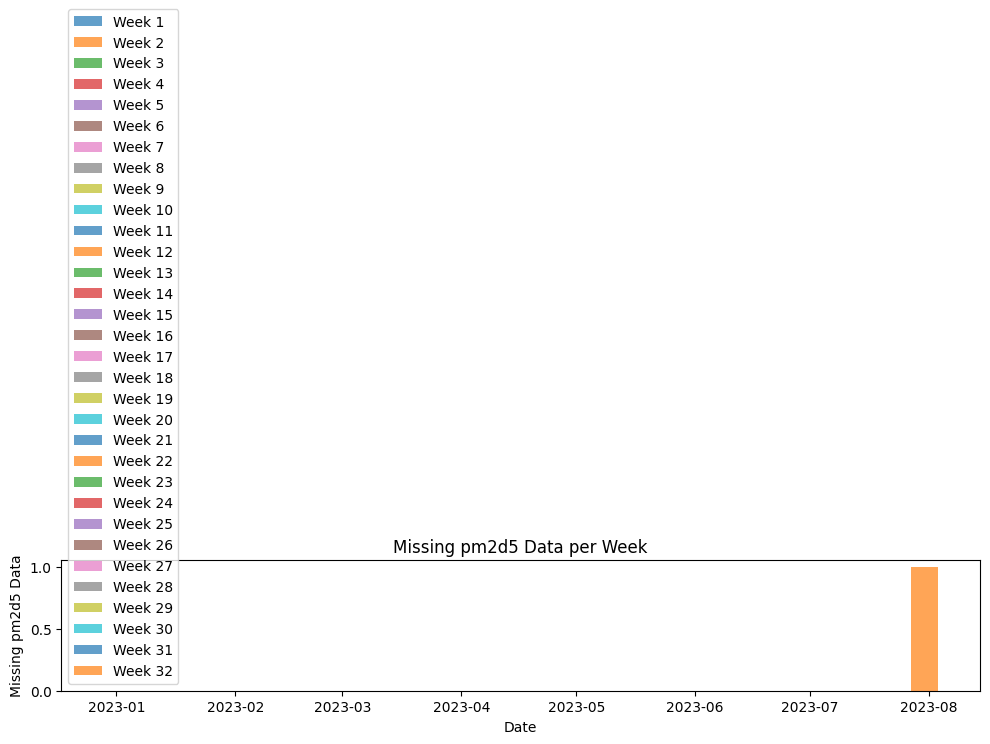

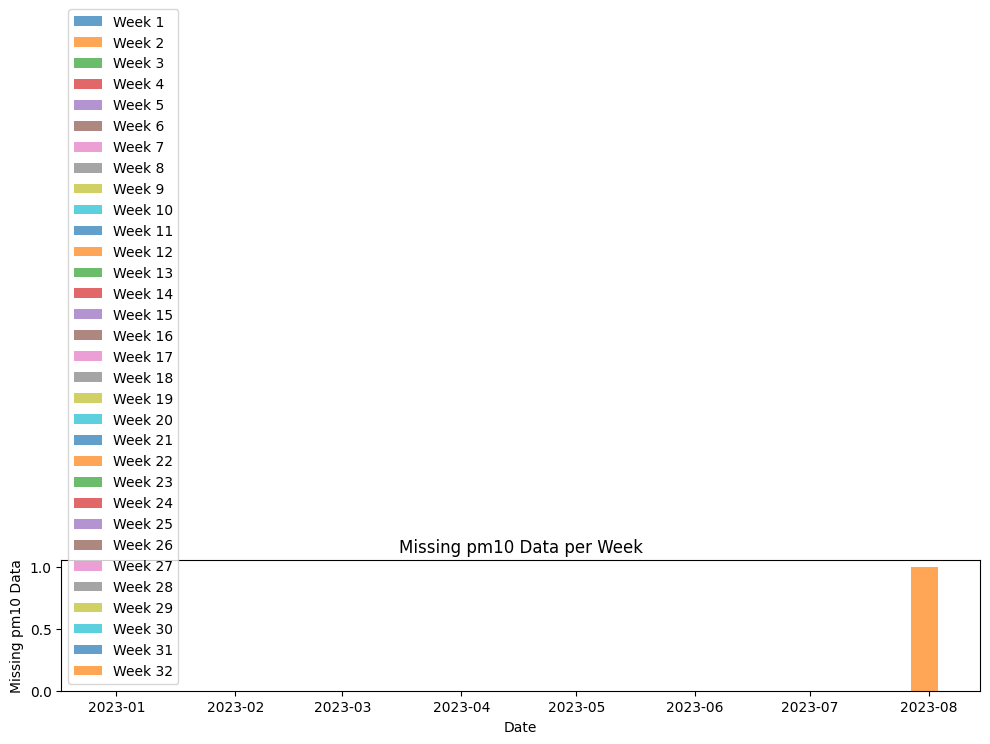

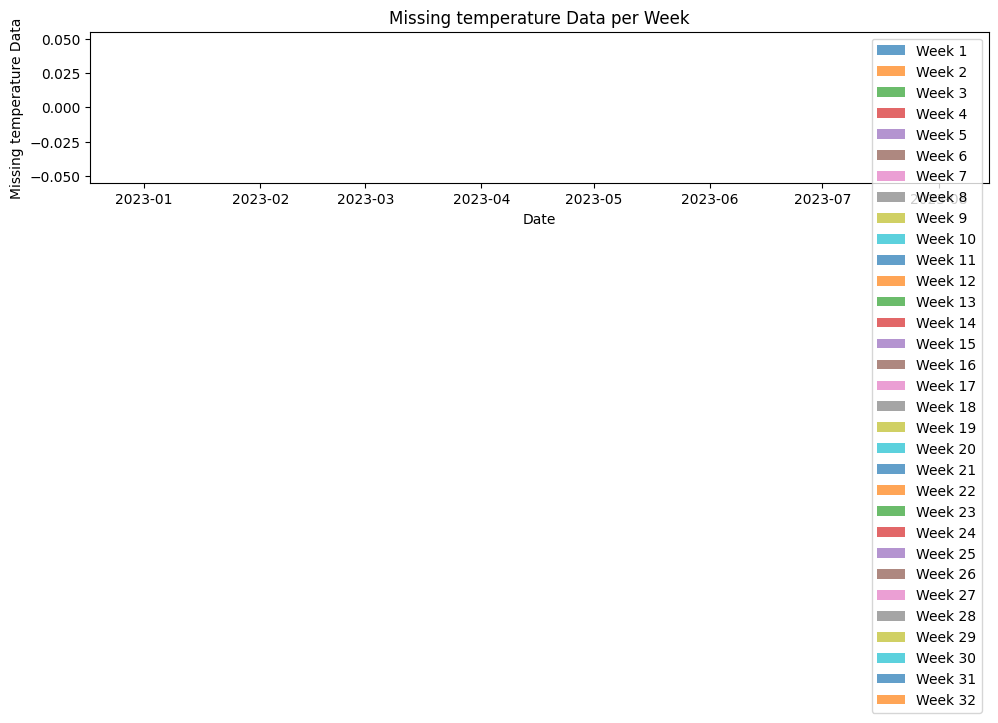

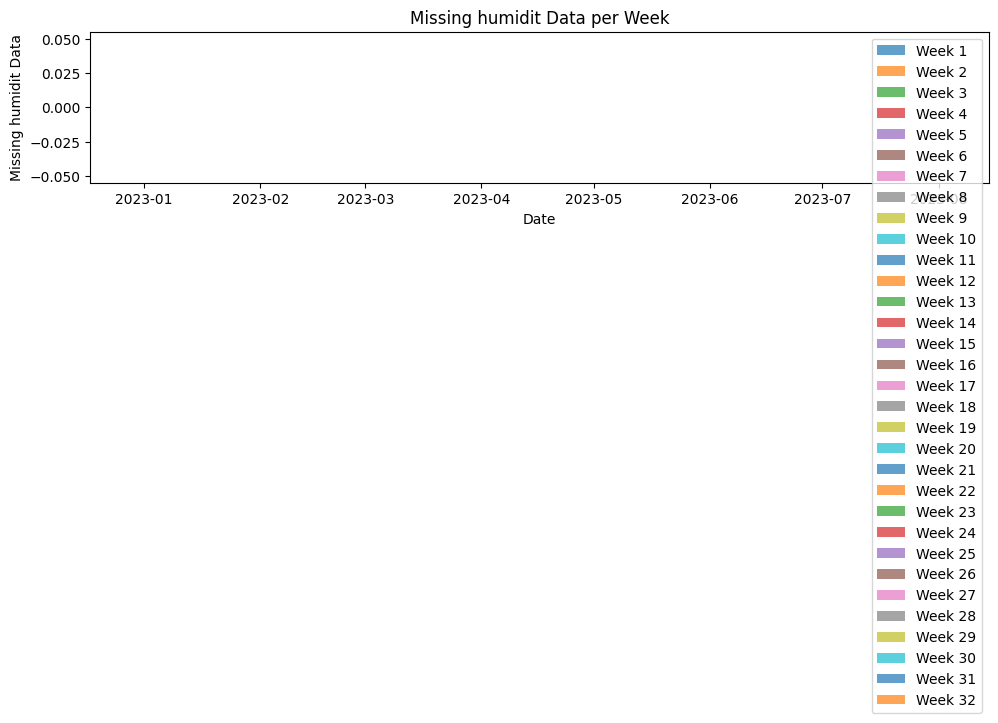

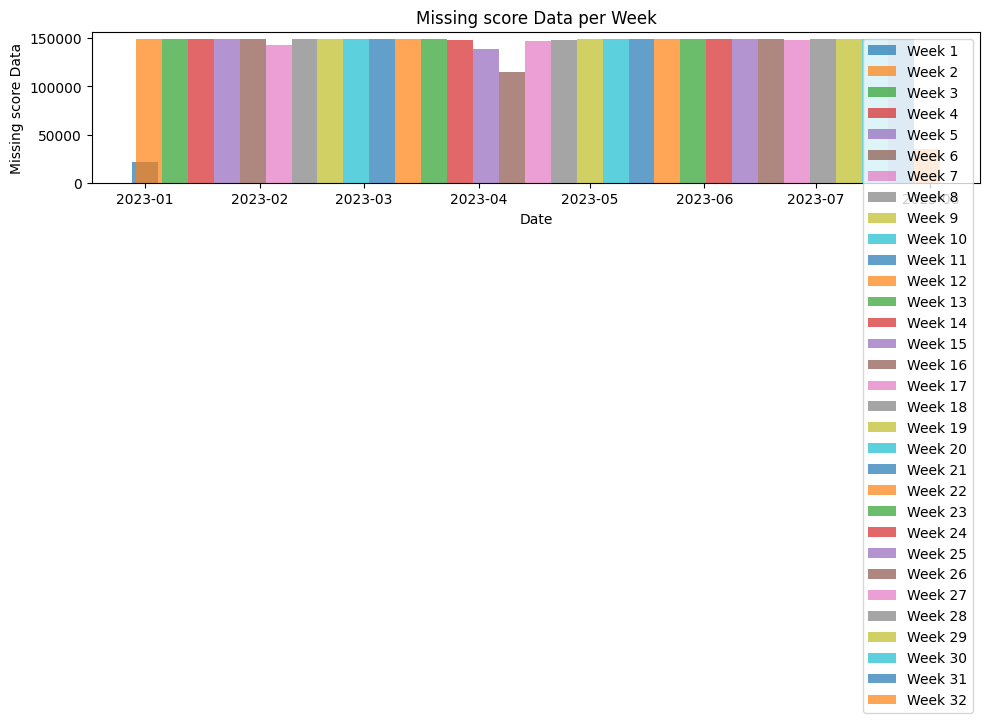

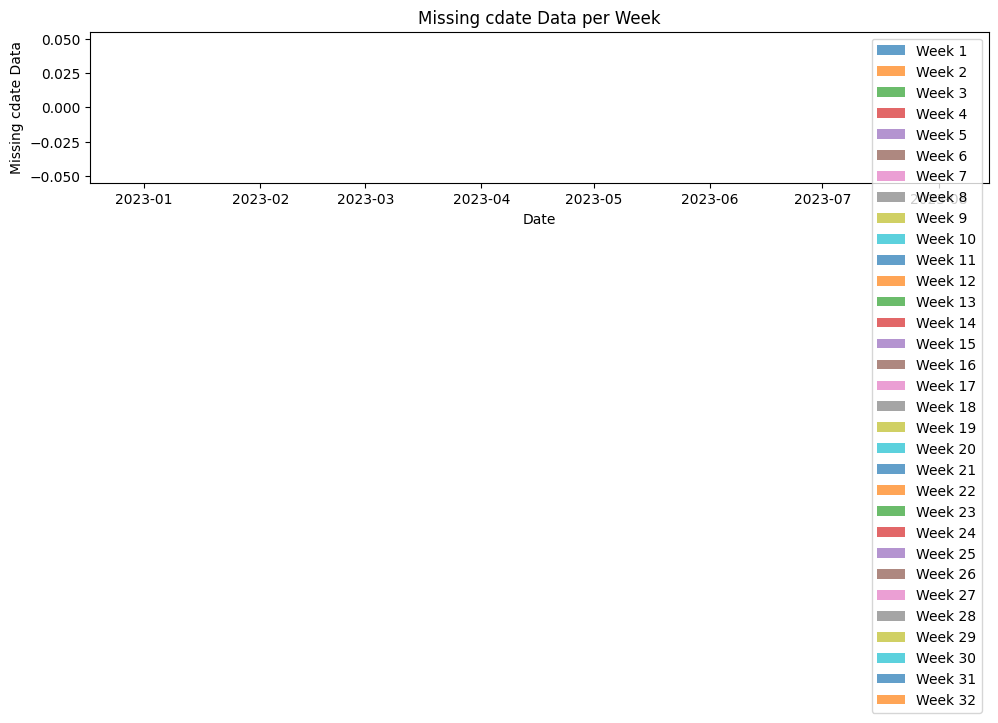

In [ ]:
# cdate 열을 날짜와 시간 형식으로 변환
plant['cdate'] = pd.to_datetime(plant['cdate'])
plant.replace("\\N", np.nan, inplace=True)

# 주차별로 데이터 분리
weeks = plant.groupby(pd.Grouper(key='cdate', freq='W'))  # 주차로 데이터 그룹화

features = plant.columns

for feature in features:
    plt.figure(figsize=(10, 5))
    for week_number, week_data in enumerate(weeks):
        week_start_date = week_data[1]['cdate'].min()
        week_end_date = week_data[1]['cdate'].max()

        # 결측치 계산
        missing_data = week_data[1][feature].isnull().sum()

        # 주차별로 결측치를 막대 그래프로 시각화
        plt.bar(week_start_date, missing_data, width=7, label=f'Week {week_number + 1}', alpha=0.7)

    plt.xlabel('Date')
    plt.ylabel(f'Missing {feature} Data')
    plt.title(f'Missing {feature} Data per Week')
    plt.legend()
    plt.tight_layout()
    plt.show()

# devices

In [ ]:
devices = pd.read_excel("/content/drive/MyDrive/ime_project/data/porest_devices.xlsx",header=1)
devices

,no,id_e,name,place,id_plant
0,1,c2-04-d8-a0-1d-58-c7-68,AHU-A/F1/1,Sale Area Zone1,c2-01-d8-a0-1d-58-cf-50
1,2,c2-04-d8-a0-1d-58-c7-28,AHU-A/F1/2,Sale Area Zone2,c2-01-d8-a0-1d-58-cf-50
2,3,c2-04-d8-a0-1d-58-ca-b0,AHU-A/F1/3,Sale Area Zone3,c2-01-d8-a0-1d-58-cf-50
3,4,c2-04-d8-a0-1d-58-c8-0c,AHU-A/F1/4,Sale Area Zone4,c2-01-d8-a0-1d-58-ca-e4
4,5,c2-04-d8-a0-1d-58-c6-b8,AHU-A/F1/5,Sale Area Zone5,c2-01-d8-a0-1d-58-ca-e4
5,6,c2-04-d8-a0-1d-58-c7-e4,AHU-A/F1/6,Sale Area Zone6,c2-01-d8-a0-1d-59-b4-b8
6,7,c2-04-d8-a0-1d-58-c7-80,AHU-A/F1/7,Sale Area Zone7,c2-01-d8-a0-1d-59-b4-b8
7,8,c2-04-d8-a0-1d-58-c7-64,AHU-A/F1/8,Sale Area Zone8,c2-01-d8-a0-1d-58-68-a4
8,9,c2-04-d8-a0-1d-58-c7-a0,AHU-A/F1/9,Sale Area Zone9,c2-01-d8-a0-1d-58-68-a4
9,10,c2-04-d8-a0-1d-58-c9-7c,AHU-A/F1/10,Sale Area Zone10,c2-01-d8-a0-1d-58-cd-a0
